<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>April 20, 2018: cleanup, `sin` and `cos` $g$ poly
<br>November 16 and 18, 2016: `expt` and `log` $g$ poly
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Catalan array $\mathcal{C}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha

from commons import *
from matrix_functions import *
from sequences import *

init_printing()

# Catalan array $\mathcal{C}$

In [2]:
m=8

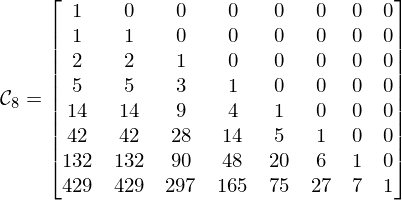

In [3]:
C = define(let=Symbol(r'\mathcal{{C}}_{{ {} }}'.format(m)), 
           be=Matrix(m, m, lambda n,k: (k+1)*binomial(2*n-k, n-k)/(n+1) if n > 0 else int(not k)))
C

In [4]:
eigendata = spectrum(C)
eigendata

In [5]:
data, eigenvals, multiplicities = eigendata.rhs

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

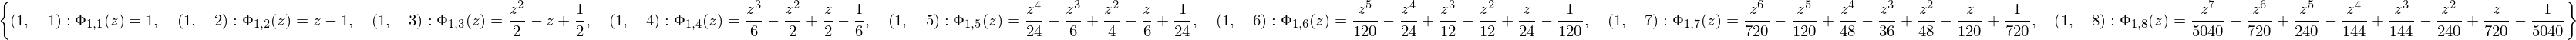

In [7]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

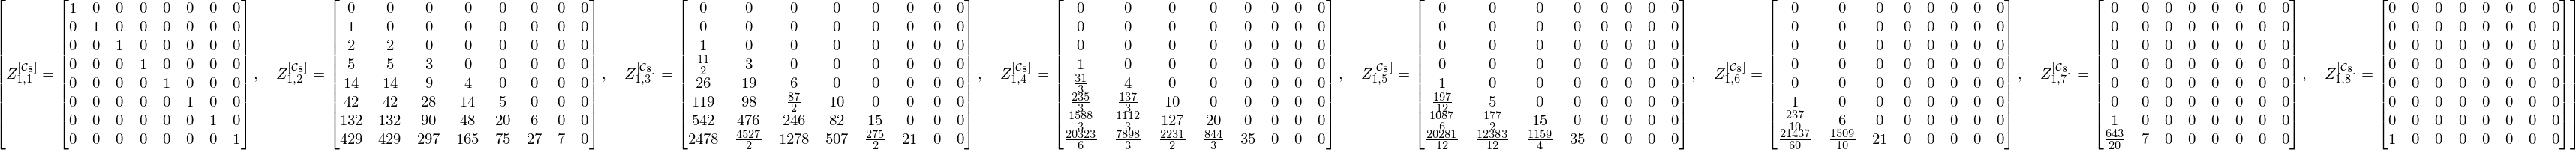

In [8]:
cmatrices = component_matrices(C, Phi_polynomials)
list(cmatrices.values())

## `power` function

In [9]:
f = Function('P')
f_power = define(let=f(z), be=z**r)
f_power

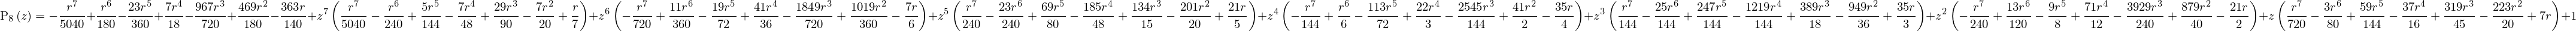

In [10]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials)
g_power = g_power.subs(eigenvals)
g_power

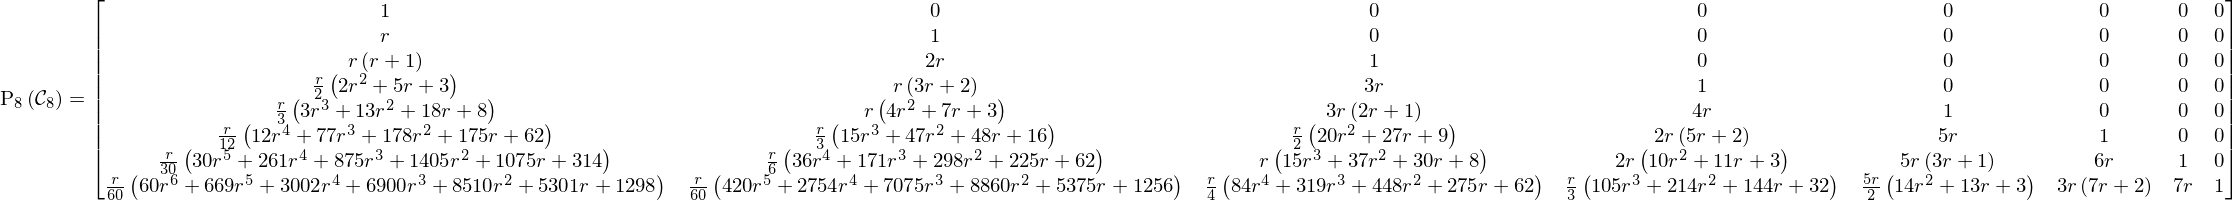

In [11]:
with lift_to_matrix_function(g_power) as G_power:
    C_power = G_power(C)
C_power

In [12]:
assert C_power.rhs == (C.rhs**r).applyfunc(simplify)

In [13]:
inspect(C_power.rhs)

nature(is_ordinary=True, is_exponential=False)

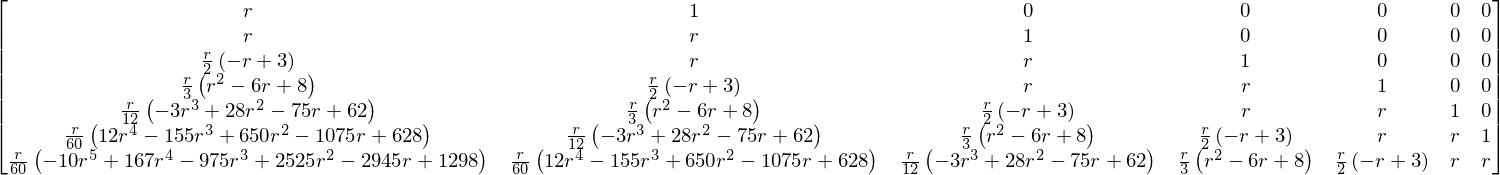

In [14]:
production_matrix(C_power.rhs)

## `inverse` function

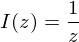

In [15]:
f = Function('I')
f_inverse = define(let=f(z), be=1/z)
f_inverse

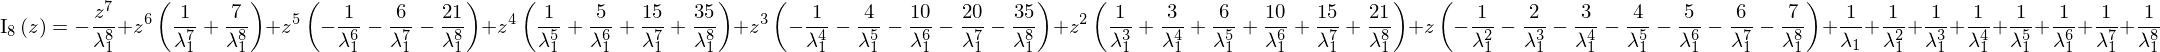

In [16]:
g_inverse = Hermite_interpolation_polynomial(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [17]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

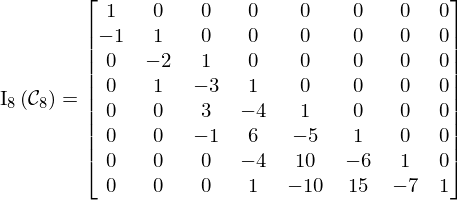

In [18]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    C_inverse = G_inverse(C)
C_inverse

In [19]:
assert C_inverse.rhs*C.rhs == Matrix(m, m, identity_matrix())
assert C_inverse.rhs == C_power.rhs.subs({r:-1})

In [20]:
inspect(C_inverse.rhs)

nature(is_ordinary=True, is_exponential=False)

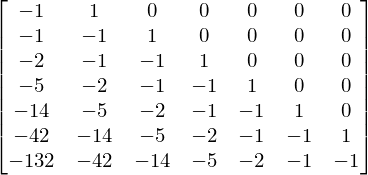

In [21]:
production_matrix(C_inverse.rhs)

## `sqrt` function

In [22]:
f = Function('R')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

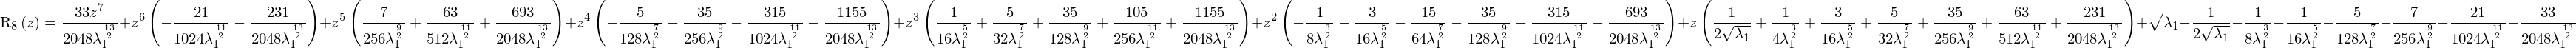

In [23]:
g_sqrt = Hermite_interpolation_polynomial(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

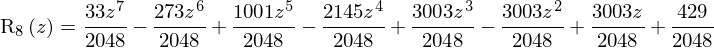

In [24]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

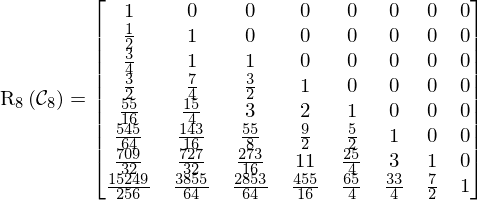

In [25]:
with lift_to_matrix_function(g_sqrt) as G_sqrt:
    C_sqrt = G_sqrt(C)
C_sqrt

In [26]:
inspect(C_sqrt.rhs)

nature(is_ordinary=True, is_exponential=False)

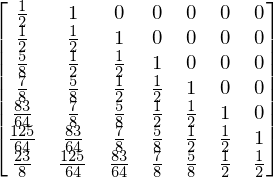

In [27]:
production_matrix(C_sqrt.rhs)

In [28]:
assert C.rhs**(S(1)/2) == C_sqrt.rhs
assert C_sqrt.rhs == C_power.rhs.subs({r:S(1)/2})

## `expt` function

In [29]:
f = Function('E')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

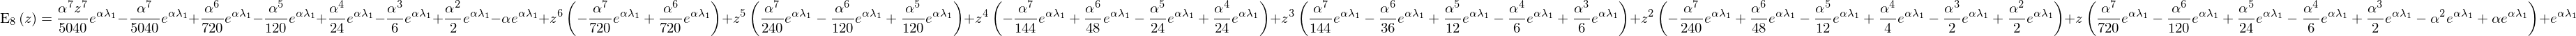

In [30]:
g_expt = Hermite_interpolation_polynomial(f_expt, eigendata, Phi_polynomials)
g_expt

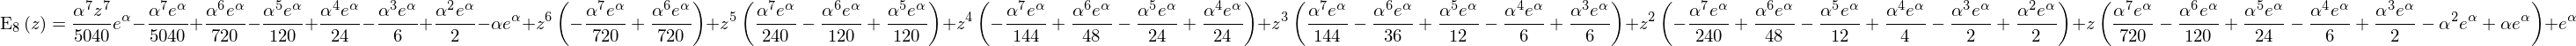

In [31]:
g_expt = g_expt.subs(eigenvals)
g_expt

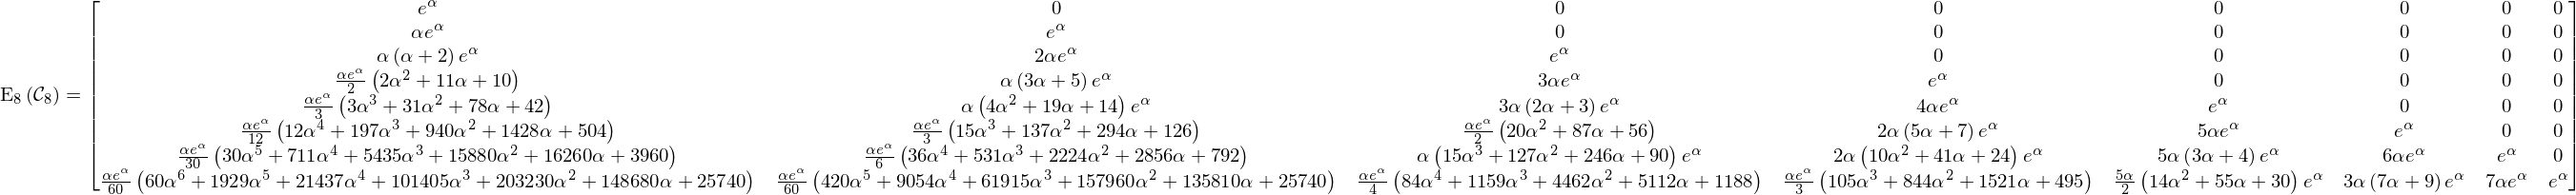

In [32]:
with lift_to_matrix_function(g_expt) as G_expt:
    C_expt = G_expt(C)
C_expt

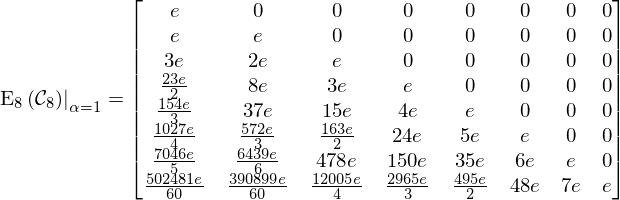

In [33]:
C_expt1 = define(let=Subs(C_expt.lhs, alpha, 1), be=C_expt.rhs.subs({alpha:1}))
C_expt1

In [34]:
inspect(C_expt.rhs)

nature(is_ordinary=False, is_exponential=False)

In [35]:
inspect(C_expt1.rhs)

nature(is_ordinary=False, is_exponential=False)

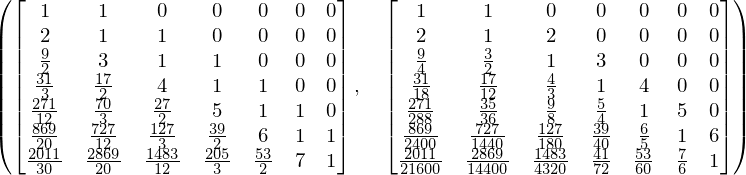

In [54]:
production_matrix(C_expt1.rhs),production_matrix(C_expt1.rhs,exp=True)

In [36]:
eigendata_Cexpt = spectrum(C_expt1)
eigendata_Cexpt

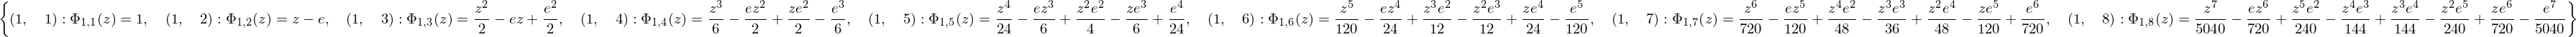

In [37]:
Phi_polynomials_Cexpt = component_polynomials(eigendata_Cexpt, early_eigenvals_subs=True)
Phi_polynomials_Cexpt

## `log` function

In [38]:
f = Function('L')
f_log = define(let=f(z), be=log(z))
f_log

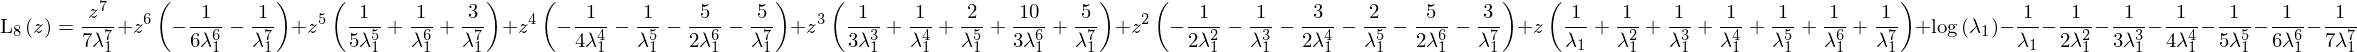

In [39]:
g_log = Hermite_interpolation_polynomial(f_log, eigendata, Phi_polynomials)
g_log

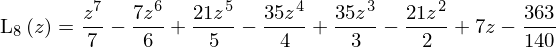

In [40]:
g_log = g_log.subs(eigenvals)
g_log

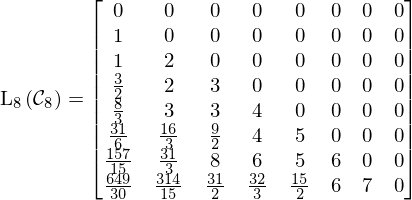

In [41]:
with lift_to_matrix_function(g_log) as G_log:
    C_log = G_log(C)
C_log

In [42]:
inspect(C_log.rhs[1:,:-1])

nature(is_ordinary=False, is_exponential=True)

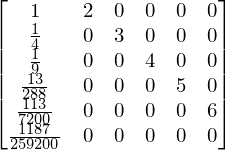

In [43]:
production_matrix(C_log.rhs[1:,:-1], exp=True)

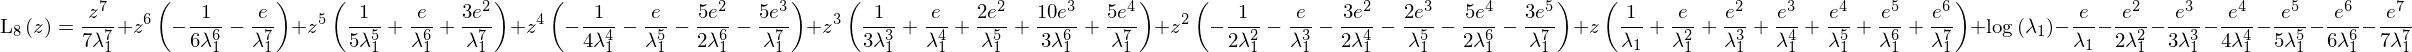

In [44]:
g_log_Cexpt = Hermite_interpolation_polynomial(f_log, eigendata_Cexpt, Phi_polynomials_Cexpt)
g_log_Cexpt

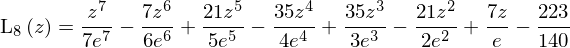

In [45]:
g_log_Cexpt = g_log_Cexpt.subs(eigendata_Cexpt.rhs[1])
g_log_Cexpt

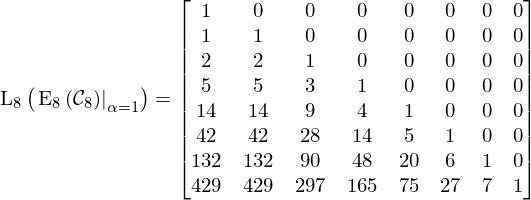

In [46]:
with lift_to_matrix_function(g_log_Cexpt) as G_log_Cexpt:
    CC = G_log_Cexpt(C_expt1)
CC

## `sin` function

In [47]:
f = Function('S')
f_sin = define(let=f(z), be=sin(z))
f_sin

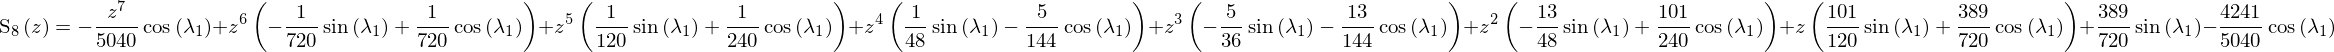

In [48]:
g_sin = Hermite_interpolation_polynomial(f_sin, eigendata, Phi_polynomials)
g_sin

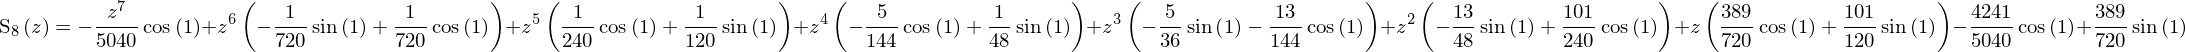

In [49]:
g_sin = g_sin.subs(eigenvals)
g_sin

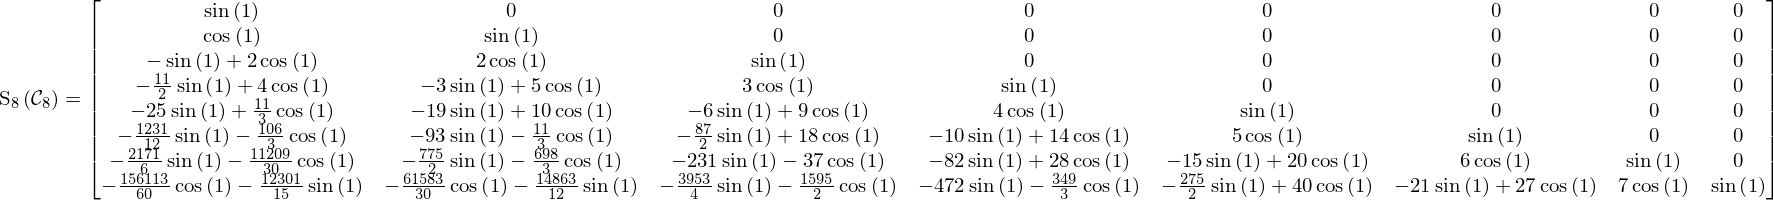

In [50]:
with lift_to_matrix_function(g_sin) as G_sin:
    C_sin = G_sin(C)
C_sin

In [ ]:
inspect(C_sin.rhs) # takes long to evaluate

## `cos` function

In [52]:
f = Function('C')
f_cos = define(let=f(z), be=cos(z))
f_cos

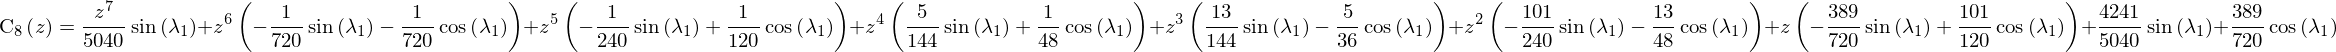

In [53]:
g_cos = Hermite_interpolation_polynomial(f_cos, eigendata, Phi_polynomials)
g_cos

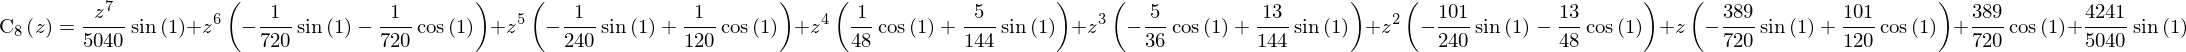

In [54]:
g_cos = g_cos.subs(eigenvals)
g_cos

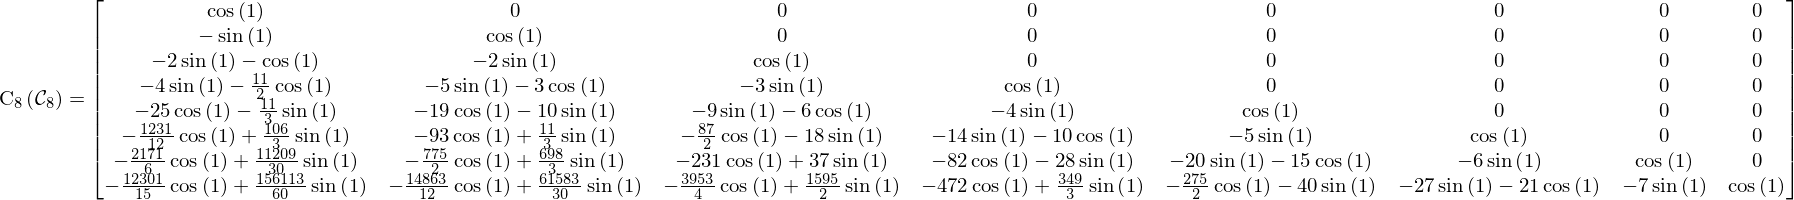

In [55]:
with lift_to_matrix_function(g_cos) as G_cos:
    C_cos = G_cos(C)
C_cos

In [ ]:
inspect(C_sin.rhs) # takes long to evaluate

In [56]:
assert (C_sin.rhs**2 + C_cos.rhs**2).applyfunc(trigsimp) == Matrix(m,m, identity_matrix())

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.